<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     50000 non-null  object 
 1   vendorid               50000 non-null  int64  
 2   tpep_pickup_datetime   50000 non-null  object 
 3   tpep_dropoff_datetime  50000 non-null  object 
 4   passenger_count        45198 non-null  float64
 5   trip_distance          50000 non-null  float64
 6   ratecodeid             45198 non-null  float64
 7   store_and_fwd_flag     45198 non-null  object 
 8   pulocationid           50000 non-null  int64  
 9   dolocationid           50000 non-null  int64  
 10  payment_type           50000 non-null  int64  
 11  fare_amount            50000 non-null  float64
 12  extra                  50000 non-null  float64
 13  mta_tax                50000 non-null  float64
 14  tip_amount             50000 non-null  float64
 15  to

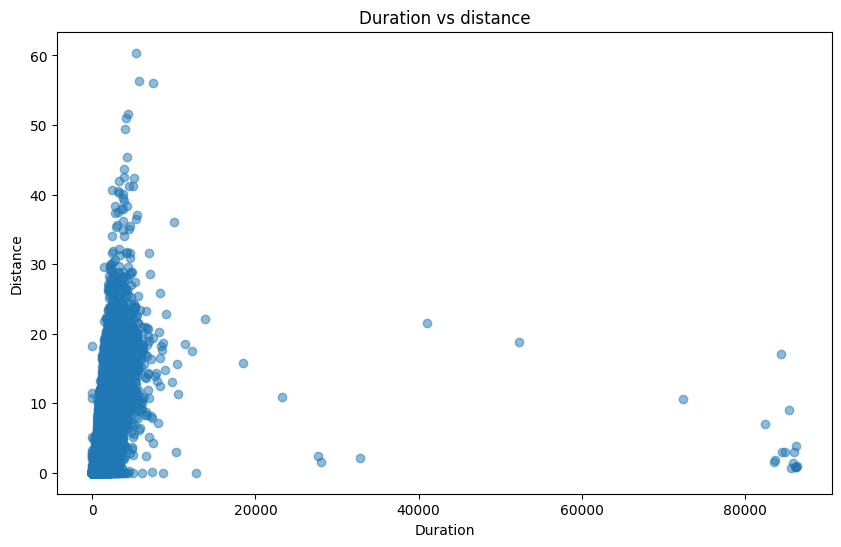

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 50000 to 99999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     50000 non-null  object 
 1   vendorid               50000 non-null  int64  
 2   tpep_pickup_datetime   50000 non-null  object 
 3   tpep_dropoff_datetime  50000 non-null  object 
 4   passenger_count        45189 non-null  float64
 5   trip_distance          50000 non-null  float64
 6   ratecodeid             45189 non-null  float64
 7   store_and_fwd_flag     45189 non-null  object 
 8   pulocationid           50000 non-null  int64  
 9   dolocationid           50000 non-null  int64  
 10  payment_type           50000 non-null  int64  
 11  fare_amount            50000 non-null  float64
 12  extra                  50000 non-null  float64
 13  mta_tax                50000 non-null  float64
 14  tip_amount             50000 non-null  float64
 15

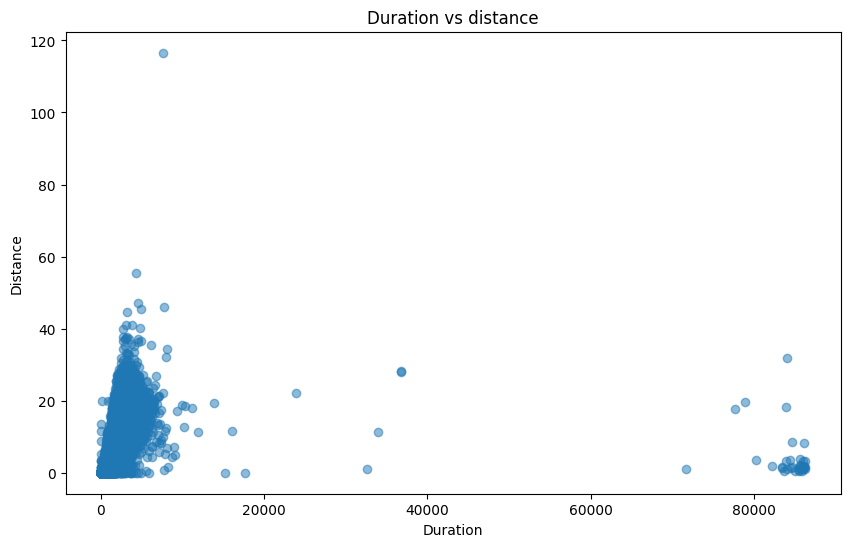

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
chunk_size = 50000
# data_chunk = pd.read_csv('training_dataset.csv', chunksize=chunk_size)

# df = next(data_chunk)
# df.head()
model = {"RandomForestRegressor": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1), 
         "DecisionTreeRegressor": DecisionTreeRegressor(max_depth=7)}
reg = {"RandomForestRegressor": None, "DecisionTreeRegressor": None}
total_X_test = pd.DataFrame()
total_y_test = pd.DataFrame()

for df in pd.read_csv("training_dataset.csv", chunksize=chunk_size):

    nan_values_per_feature = df.isnull().sum()
    nan_total = sum(list(df.isnull().sum()))
    # Count number of rows that contain at least one NaN
    rows_with_nan = df.isnull().any(axis=1).sum()

    # print(f"The dataset length: \t\t{c.BLUE}{len(df)}{c.END}")
    # print(f"Total number of missing values: {c.BOLD}{nan_total}{c.END}\n")
    # print(f"Total number of rows with missing values: {rows_with_nan}\n")

    # print(f"{c.BOLD}Printing how many entries in each column contain no NaN values{c.END}:")
    df.info()

    df.dropna(inplace=True)

    column_names = ["ID", "vendorid","tpep_pickup_datetime", "tpep_dropoff_datetime","passenger_count", "trip_distance",
                    "ratecodeid","store_and_fwd_flag","pulocationid","dolocationid","payment_type","fare_amount",
                    "extra","mta_tax","tip_amount","tolls_amount","improvement_surcharge","total_amount","congestion_surcharge","airport_fee","duration"]                 
                
    df.columns = column_names

    df = df.drop(columns=["ID"], axis=1)
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

    df['tpep_pickup_year'] = df['tpep_pickup_datetime'].dt.year
    df['tpep_pickup_month'] = df['tpep_pickup_datetime'].dt.month
    df['tpep_pickup_day'] = df['tpep_pickup_datetime'].dt.day
    df['tpep_pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
    df['tpep_pickup_minute'] = df['tpep_pickup_datetime'].dt.minute
    df['tpep_pickup_second'] = df['tpep_pickup_datetime'].dt.second

    df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

    df['tpep_dropoff_year'] = df['tpep_dropoff_datetime'].dt.year
    df['tpep_dropoff_month'] = df['tpep_dropoff_datetime'].dt.month
    df['tpep_dropoff_day'] = df['tpep_dropoff_datetime'].dt.day
    df['tpep_dropoff_hour'] = df['tpep_dropoff_datetime'].dt.hour

    df['tpep_dropoff_minute'] = df['tpep_dropoff_datetime'].dt.minute
    df['tpep_dropoff_second'] = df['tpep_dropoff_datetime'].dt.second


    # Optionally drop the original datetime column
    df = df.drop(columns=['tpep_pickup_datetime'], axis=1)
    df = df.drop(columns=['tpep_dropoff_datetime'], axis=1)

    # df = df.drop(columns=['tpep_pickup_month'], axis=1)
    # df = df.drop(columns=['tpep_dropoff_month'], axis=1)

    mapping = {'N': 0, 'Y': 1}
    df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map(mapping)

    # Assuming 'trip_distance' is the column for distance and 'duration' is the column for time
    # plt.figure(figsize=(10, 6))
    # plt.scatter(df['duration'],df['trip_distance'], alpha=0.5)
    # plt.title('Duration vs distance')
    # plt.xlabel('Duration')
    # plt.ylabel('Distance')
    # plt.show()


    # Filtering out the outliers
    df = df[(df['duration'] < 2880) & (df['duration']>30)]
    df = df[(df['trip_distance'] < 300) & (df['trip_distance']>0.25)]
    

    # Plotting the filtered data
    # plt.figure(figsize=(10, 6))
    # plt.scatter(df['duration'],df['trip_distance'], alpha=0.5)
    # plt.title('Duration vs distance')
    # plt.xlabel('Duration')
    # plt.ylabel('Distance')
    # plt.show()

    # plt.figure(figsize=(10, 6))
    # plt.scatter(df['duration'],df['fare_amount'], alpha=0.5)
    # plt.title('Duration vs fare amount')
    # plt.xlabel('Duration')
    # plt.ylabel('Fare amount')
    # plt.show()

    # df = df[(df['fare_amount'] < 150) & (df['fare_amount'] > 0)]

    # plt.figure(figsize=(10, 6))
    # plt.scatter(df['duration'],df['fare_amount'], alpha=0.5)
    # plt.title('Duration vs fare amount')
    # plt.xlabel('Duration')
    # plt.ylabel('Fare amount')
    # plt.show()

    df = df.drop(columns=[
        'tpep_pickup_year', 
        'tpep_dropoff_year', 
        'store_and_fwd_flag',
        'airport_fee',
        'payment_type', 
        'congestion_surcharge',
        'passenger_count', 
        'vendorid',
        'improvement_surcharge',
        'tolls_amount',
        'extra',
        'tip_amount',
        'tpep_dropoff_day',
        'tpep_pickup_day',
        'tpep_pickup_month',
        'tpep_pickup_second',
        'tpep_dropoff_second',
        # 'vendorid',
        # 'mta_tax',
        # 'pulocationid',
        # 'tpep_dropoff_month',
        # 'dolocationid',
        # 'total_amount',
        # 'tpep_pickup_minute',
        # 'tpep_dropoff_minute',
        # 'tpep_pickup_hour',
        # 'tpep_dropoff_hour'
        
    ], axis=1)

    X_data = df.drop('duration', axis=1)
    y_data = df['duration']


    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
    total_X_test = pd.concat([total_X_test, X_test])
    total_y_test = pd.concat([total_y_test, y_test])
    

    # Standardize numerical features
    num_features = df.select_dtypes(include=["number"]).columns
    scaler = StandardScaler()
    df_scaled = df.copy()
    df_scaled[num_features] = scaler.fit_transform(df[num_features])

    # Prepare train/test data
    X = df_scaled.drop(columns=["duration"])  # Ensure duration is dropped
    y = df_scaled["duration"]  # Predicting duration

    # Train-test split (assuming it's done before)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for model_name in model.keys():
        reg[model_name] =  model[model_name].fit(X_train, y_train)
        

    # Scatter plot
    # plt.scatter(y_test, y_pred, alpha=0.5)
    # plt.plot([0, 5], [0, 5], '--k')  # Reference line
    # plt.xlabel("True duration")
    # plt.ylabel("Predicted duration")
    # plt.show()

    # Feature importance
    # importances = reg.feature_importances_
    # feature_names = X_train.columns 

# Evaluate model
for model_name in model.keys():
    y_pred = model[model_name].predict(total_X_test)  # Predict using the model
    mse = mean_squared_error(total_y_test, y_pred)  # Compute MSE
    score = model[model_name].score(total_X_test, total_y_test)  # Compute R^2 score

    print(f"MSE {model_name}: {mse}")
    print(f"Score {model_name}: {score}")


    # Sort and plot feature importance
    # indices = np.argsort(importances)[::-1]
    # plt.figure(figsize=(10, 6))
    # plt.bar(range(len(importances)), importances[indices], tick_label=np.array(feature_names)[indices])
    # plt.xticks(rotation=45)
    # plt.xlabel("Features")
    # plt.ylabel("Importance Score")
    # plt.title("Feature Importance (Random Forest)")
    # plt.show()

    # # Print sorted feature importance
    # for i in indices:
    #     print(f"{feature_names[i]} - Score: {importances[i]:.5f}")